### DSPT6 - Adding Data Science to a Web Application

The purpose of this notebook is to demonstrate:
- Simple online analysis of data from a user of the Twitoff app or an API
- Train a more complicated offline model, and serialize the results for online use

In [1]:
import sqlite3
import pickle
import pandas as pd

In [2]:
# Connect to sqlite database
conn = sqlite3.connect('../GuessWho/GuessWho.sqlite')

In [3]:
def get_data(query, conn):
    '''Function to get data from SQLite DB'''
    
    cursor = conn.cursor()
    result = cursor.execute(query).fetchall()

    # Get columns from cursor object
    columns = list(map(lambda x: x[0], cursor.description))

    # Assign to DataFrame
    df = pd.DataFrame(data=result, columns=columns)
    return df

In [4]:
query = '''
SELECT
	tweet.id,
	tweet.text,
	tweet.embedding,
	user.username
FROM tweet
JOIN user ON tweet.user_id = user.id;
'''

df =  get_data(query, conn)
df['embedding_decoded'] = df.embedding.apply(lambda x: pickle.loads(x[2:]))
print(df.shape)
df.head()

(874, 5)


,id,text,embedding,username,embedding_decoded
0,828910824,Listening to the new coldplay CD,b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,Rachel_Nichols,"[0.189062, 0.199601, 1.50228, -1.37959, 1.0133..."
1,829110047,goin to breakfast with the gramps...poached eg...,b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,Rachel_Nichols,"[0.189062, 0.199601, 1.50228, -1.37959, 1.0133..."
2,862143849,"eating lemon bars, drinkin coffee and workin away",b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,Rachel_Nichols,"[0.189062, 0.199601, 1.50228, -1.37959, 1.0133..."
3,868683006,missing my amazing trip to canada,b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,Rachel_Nichols,"[0.189062, 0.199601, 1.50228, -1.37959, 1.0133..."
4,869044314,going to the gym -- then off to shoreline to s...,b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,Rachel_Nichols,"[0.189062, 0.199601, 1.50228, -1.37959, 1.0133..."


In [5]:
df.iloc[0].embedding

b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00]\x94(G?\xc83/\x01uK\x06G?\xc9\x8c\x86\x8b\x9f\xdb\xd3G?\xf8\tV\xc0\xd6\xf5EG\xbf\xf6\x12\xcc\xf6\xbe7\xdfG?\xf06\x8f\x08F\x1f\x9fG?\xdc\x1du[\xcc\xafqG?\xe3\xdf\x11r\xef\n\xe5G\xbf\xc1\xe0\xd6o\x0c\xfe\x15G\xbf\xbaSe\x01\xe2XOG\xbf\xea\xb7\x97F\x02B\xd0G?\xc8\xf2j\xec\x07$\xb7G?\xcf\x1bG\x84#\x0f\xd0G\xbf\xc6\xcd\xafJ\xdb\xc6eG\xbf\xd43\x82\xe4Kn\x93G\xbf\xed\xb6\xe2\xeb\x1cC-G\xbf\xe6\xcdDVq%\xddG?\xd5\x81\xc2\xe3>\xff\x19G\xbf\xd3\xf68\x00!\x8d\xefG?\xb7g\xbf+\xfaY\xceG?\xdfi\xb5\xa6?\x9aJG\xbf{\xdb\xd3\xa5\xd9\xee\xc9G\xbf\xdb\x82Q~w\xd5$G\xbf\xc7\xdd\xdb\x12\t\xed\xc0G?\xd1\xb9M\x94\x07\x89aG?\xd4\xbc\xb5\xfeT.UG\xbf\xdf\x9en\xebp&\x03G?\xc8\xb4\x84\xd7j\xb5\x80G\xbf\xe0%vF\xae:;G\xbf\xe6\x08T\xcd\xb7\xaeXG\xbf\xc7\xe99\xea\xddY\x0cG?\xe3\xa5\x11\x9c\xe0u\xf7G?\xa39Aj-\x9bDG\xbf\xd8\xa5\x1a\x00\\FRG?\xf2\x9f\xe8h3\xc6\x00G\xbf\xe0\xf0\xde\x8fl\xef\xedG?\xd5\x83\xe8Wl\xce_G\xbf\xd0\x10D\xf1\xa1\x98lG\xbf\xde\x06\x0f\xe4y\x91\xbcG\xbf\xb

In [6]:
pickle.loads(df.iloc[0].embedding[2:])

[0.189062,
 0.199601,
 1.50228,
 -1.37959,
 1.01332,
 0.439298,
 0.62098,
 -0.139674,
 -0.102835,
 -0.834911,
 0.194898,
 0.24302,
 -0.178152,
 -0.315644,
 -0.928575,
 -0.712557,
 0.336045,
 -0.311903,
 0.0914268,
 0.490827,
 -0.00680144,
 -0.429829,
 -0.186458,
 0.276935,
 0.324018,
 -0.494045,
 0.193009,
 -0.504573,
 -0.688517,
 -0.186805,
 0.6139,
 0.0375462,
 -0.385077,
 1.16404,
 -0.529403,
 0.336176,
 -0.250993,
 -0.46912,
 -0.108129,
 -0.140378,
 0.429218,
 -0.0871409,
 0.284653,
 -0.641822,
 -0.636036,
 0.583221,
 -2.58907,
 -0.105805,
 -0.792718,
 -0.240128,
 -0.376897,
 -0.101973,
 -0.0485542,
 0.255869,
 1.00836,
 0.323287,
 -0.414735,
 -0.365337,
 -1.44226,
 0.0289014,
 1.05803,
 0.376251,
 -0.212284,
 0.531166,
 0.926153,
 -0.588961,
 0.535558,
 -0.300183,
 0.724711,
 0.516236,
 0.510968,
 -0.0708539,
 -0.516426,
 0.446238,
 -0.334413,
 -0.872867,
 -0.32674,
 0.365204,
 -0.0888717,
 0.732909,
 -0.170869,
 -0.439819,
 -0.627538,
 -0.376551,
 -0.0905202,
 0.0373277,
 0.412,


In [7]:
df.username.value_counts()

loneblockbuster    200
realgollumtrump    128
TonyBakerComedy    119
USPS                85
WorldwideWob        71
drewtoothpaste      64
HaikuJustice        58
AlyssaLimp          54
MinaKimes           31
elonmusk            24
 Rachel_Nichols     21
JoshGondelman       19
Name: username, dtype: int64

In [11]:
import numpy as np
user1_embeddings = df.embedding_decoded[df.username=='elonmusk']
user2_embeddings = df.embedding_decoded[df.username=='USPS']
embeddings = pd.concat([user1_embeddings, user2_embeddings])

embeddings_df = pd.DataFrame(embeddings.tolist(),
                           columns=[f'dim{i}' for i in range(768)])
labels = np.concatenate([np.ones(len(user1_embeddings)),
                         np.zeros(len(user2_embeddings))])

print(embeddings_df.shape, labels.shape)

(109, 768) (109,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    embeddings_df, labels, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape)

(81, 768) (28, 768)


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
dir(lr)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'w

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



Text(0.5, 1.0, 'LogReg Confusion Matrix')

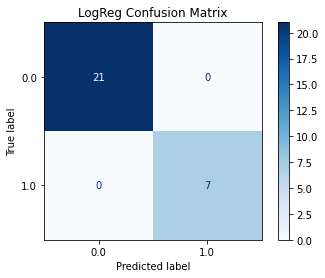

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix


y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')
plt.title('LogReg Confusion Matrix')

In [16]:
# this could be (../Models/logreg.pkl) because of where this notebook lives
pickle.dump(lr, open('Models/logreg.pkl', 'wb'))

In [17]:
lr_unpickled = pickle.load(open('Models/logreg.pkl', 'rb'))
lr_unpickled

LogisticRegression(max_iter=1000)

In [18]:
import basilica

BASILICA_KEY='91452937-dd76-decb-e2f0-0446bc3edc1e'
BASILICA = basilica.Connection(BASILICA_KEY)

In [19]:
example_text = BASILICA.embed_sentence('The mars rover just reported new and interesting data!', model='twitter')

In [20]:
lr_unpickled.predict(X_test)

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.])

In [21]:
lr_unpickled.predict_proba([example_text])

array([[0.96293618, 0.03706382]])